In [67]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np

In [68]:
import yfinance as yf
import pandas as pd

# List of stock tickers from various sectors
stocks = [
    'AAPL', 'MSFT', 'NVDA', 'GOOGL', 'TSLA', 'META',  # Technology
    'PFE', 'JNJ', 'MRK', 'UNH',  # Health Technology
    'AMZN', 'NFLX', 'DIS', 'SBUX', 'ABNB',  # Consumer Services
    'BRK-B', 'JPM', 'BAC', 'WFC', 'GS',  # Finance
    'WMT', 'COST', 'HD', 'PG', 'NKE',  # Retail Trade
    'CVX', 'XOM',  # Energy
    'GE', 'BA',  # Industrial Goods
    'UBER'  # Transportation
]

# List to store DataFrames for each stock
stock_dataframes = []

# Download adjusted close price data for each stock and store in DataFrame
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2021-01-04')

    # Select only the "Adj Close" column and rename it with the stock ticker
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})

    # Append DataFrame to list
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)

print(stock_prices.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


                  AAPL        MSFT        NVDA      GOOGL        TSLA  \
Date                                                                    
2021-01-04  126.830070  211.224304  130.834000  86.306503  243.256668   
2021-01-05  128.398178  211.428055  133.739777  87.002502  245.036667   
2021-01-06  124.076096  205.945892  125.855431  86.143997  251.993332   
2021-01-07  128.309982  211.806488  133.133682  88.717003  272.013336   
2021-01-08  129.417480  213.097000  132.462738  89.891502  293.339996   

                  META        PFE         JNJ        MRK         UNH  ...  \
Date                                                                  ...   
2021-01-04  268.654968  32.333992  143.276230  69.814491  333.932312  ...   
2021-01-05  270.682800  32.667774  144.960739  69.935204  329.441650  ...   
2021-01-06  263.030914  32.386688  146.324860  71.038994  343.267181  ...   
2021-01-07  268.455170  32.553585  146.819229  72.453224  348.770599  ...   
2021-01-08  267.286407  32

In [69]:


# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Assuming stock_prices is your DataFrame with stock data
# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date]

# Check for missing data and handle it
filtered_data = filtered_data.dropna()

# Calculate returns
returns = filtered_data.pct_change().dropna()

# Compute covariance matrix
cov_matrix = returns.cov()

# Display the filtered data and the head of the covariance matrix
print(filtered_data)
print(cov_matrix.head())


                  AAPL        MSFT        NVDA       GOOGL        TSLA  \
Date                                                                     
2021-01-04  126.830070  211.224304  130.834000   86.306503  243.256668   
2021-01-05  128.398178  211.428055  133.739777   87.002502  245.036667   
2021-01-06  124.076096  205.945892  125.855431   86.143997  251.993332   
2021-01-07  128.309982  211.806488  133.133682   88.717003  272.013336   
2021-01-08  129.417480  213.097000  132.462738   89.891502  293.339996   
...                ...         ...         ...         ...         ...   
2024-01-25  193.659882  403.395081  616.141052  151.869995  182.630005   
2024-01-26  191.914474  402.458496  610.281372  152.190002  183.250000   
2024-01-29  191.226288  408.227386  624.620728  153.509995  190.929993   
2024-01-30  187.545975  407.101501  627.710571  151.460007  191.589996   
2024-01-31  183.915543  396.131622  615.241150  140.100006  187.289993   

                  META        PFE    

Plot of Adjusted Prices

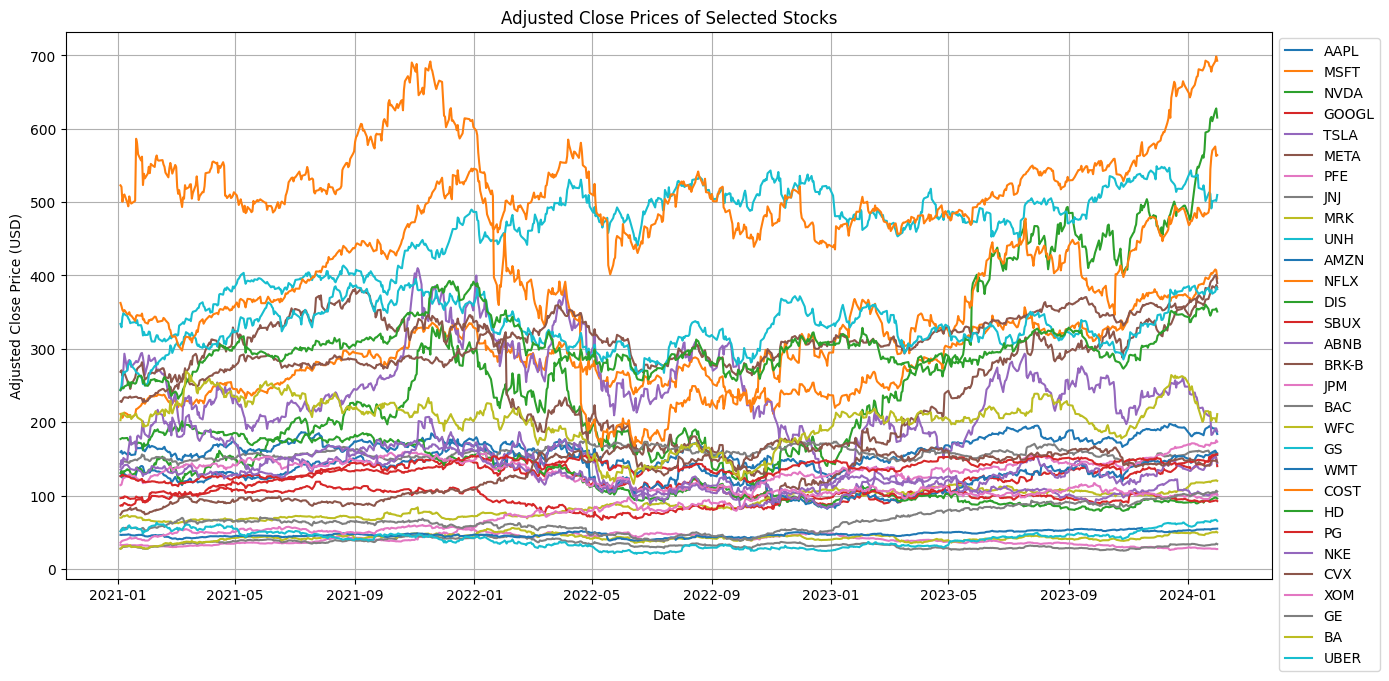

In [70]:
# Plot the filtered adjusted close prices
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(14, 7))
for stock in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[stock], label=stock)

plt.title('Adjusted Close Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

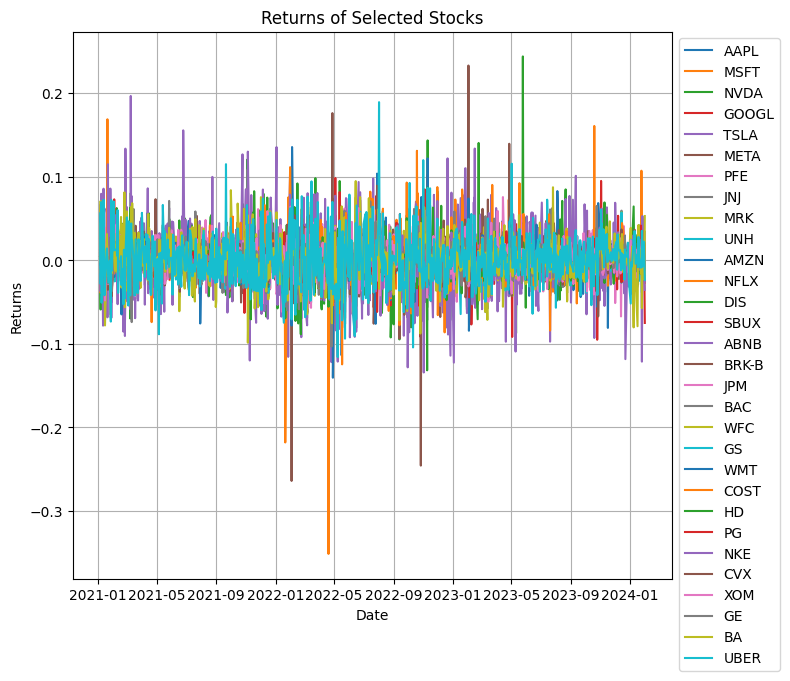

In [71]:

plt.figure(figsize=(8, 7))
for stock in returns.columns:
    plt.plot(returns.index, returns[stock], label=stock)

plt.title('Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

Data Split Bar plot

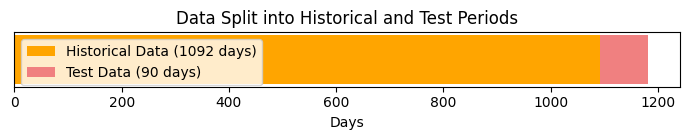

In [72]:
import matplotlib.pyplot as plt

# Define the duration of the historical and test periods
historical_duration = 1092  # Days from January 4, 2021 to January 31, 2024
test_duration = 90          # Days from February 1, 2024 to April 30, 2024

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 1.5))

# Plot the historical data portion
ax.barh(y=0, width=historical_duration, left=0, height=0.5, color='orange', label='Historical Data (1092 days)')

# Plot the test data portion
ax.barh(y=0, width=test_duration, left=historical_duration, height=0.5, color='lightcoral', label='Test Data (90 days)')

# Add labels and title
ax.set_yticks([])
ax.set_xlabel('Days')
ax.set_title('Data Split into Historical and Test Periods')
ax.legend()

# Save the plot as a JPG file
plt.tight_layout()
plt.savefig('data_split_plot.jpg', format='jpg')
plt.show()


In [73]:
# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date] #2021-01-04 to 2024-01-31

# Calculate returns
returns = filtered_data.pct_change().dropna()   #773 rows

# Compute covariance matrix
cov_matrix = returns.cov()
filtered_data
print(cov_matrix.head())

           AAPL      MSFT      NVDA     GOOGL      TSLA      META       PFE  \
AAPL   0.000304  0.000218  0.000362  0.000231  0.000345  0.000283  0.000050   
MSFT   0.000218  0.000302  0.000390  0.000253  0.000285  0.000299  0.000051   
NVDA   0.000362  0.000390  0.001098  0.000400  0.000652  0.000507  0.000047   
GOOGL  0.000231  0.000253  0.000400  0.000400  0.000305  0.000375  0.000047   
TSLA   0.000345  0.000285  0.000652  0.000305  0.001368  0.000386  0.000025   

            JNJ       MRK       UNH  ...       WMT      COST        HD  \
AAPL   0.000041  0.000026  0.000069  ...  0.000063  0.000142  0.000133   
MSFT   0.000034  0.000021  0.000069  ...  0.000056  0.000136  0.000128   
NVDA   0.000014  0.000002  0.000071  ...  0.000066  0.000219  0.000207   
GOOGL  0.000035  0.000020  0.000056  ...  0.000061  0.000136  0.000132   
TSLA   0.000011 -0.000021  0.000069  ...  0.000066  0.000204  0.000165   

             PG       NKE       CVX       XOM        GE        BA      UBER  
AA

In [74]:
#As if we hold the portfolio for 3 months Feb Mar Apr
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 4, 30)

# Calculate returns for February to April 2024
specific_months_returns = stock_prices.loc[start_date:end_date].pct_change().dropna() # 61rows and 30 columns
print(specific_months_returns.head())

                AAPL      MSFT      NVDA     GOOGL      TSLA      META  \
Date                                                                     
2024-02-02 -0.005405  0.018426  0.049709  0.008643 -0.005030  0.203176   
2024-02-05  0.009847 -0.013545  0.047944  0.009130 -0.036454 -0.032801   
2024-02-06  0.008632 -0.000395 -0.015995  0.002923  0.022313 -0.010209   
2024-02-07  0.000581  0.021110  0.027498  0.009993  0.013398  0.032701   
2024-02-08 -0.005755  0.000145 -0.006534  0.002542  0.010555  0.000873   

                 PFE       JNJ       MRK       UNH  ...       WMT      COST  \
Date                                                ...                       
2024-02-02 -0.013192 -0.011051  0.000237  0.006093  ...  0.007486  0.007097   
2024-02-05 -0.013368 -0.005172 -0.001820 -0.014249  ... -0.005367  0.002368   
2024-02-06  0.035002  0.014506  0.005548  0.015329  ...  0.006818 -0.000520   
2024-02-07  0.002182 -0.000506  0.004650  0.017076  ... -0.002532  0.012648   
2024-02

In [75]:
# Assuming 'returns' is a pandas DataFrame of asset returns
num_assets = 30
expected_returns = returns.mean().values

# Optimization variables
weights = cp.Variable(num_assets)

# Portfolio return
portfolio_return = weights.T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights is 1
    weights >= 0,          # Weights are non-negative
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = weights.value
optimized_return = portfolio_return.value
optimized_variance = portfolio_variance.value

print("Optimized Weights:", optimized_weights)

Optimized Weights: [1.35673935e-09 1.83594769e-08 1.09132296e-01 2.27908797e-09
 5.52372139e-10 1.81378703e-09 1.48866578e-09 1.26137932e-08
 3.15657703e-01 5.88604560e-02 6.59746873e-10 9.58231647e-10
 4.14305419e-10 9.00445515e-10 8.96007254e-10 2.06757905e-07
 2.64999941e-09 9.58299634e-10 4.41534160e-09 2.43094362e-09
 7.15649030e-09 1.51231561e-01 4.50009498e-09 7.19300277e-02
 5.27212510e-10 2.91707002e-09 2.47416145e-01 4.57715359e-02
 7.45513007e-10 1.30643738e-09]


In [76]:
growth_rate = 1+specific_months_returns
growth_rate
daily_returns = growth_rate.dot(optimized_weights)
daily_returns = growth_rate.dot(optimized_weights)
print(daily_returns)
quarter_return = np.prod(daily_returns)
quarter_return


Date
2024-02-02    1.005806
2024-02-05    1.003605
2024-02-06    1.002832
2024-02-07    1.007692
2024-02-08    1.002357
                ...   
2024-04-24    0.996617
2024-04-25    1.015049
2024-04-26    1.002489
2024-04-29    1.000379
2024-04-30    0.991885
Length: 61, dtype: float64


1.1167506959291702

In [77]:
print("A Quarter Realized Return is:", quarter_return-1)
print("SD of Daily Portfolio Returns",np.std(daily_returns, ddof=1))

A Quarter Realized Return is: 0.1167506959291702
SD of Daily Portfolio Returns 0.007188078530205487


In [78]:
# Given data
quarter_return
daily_sd = np.std(daily_returns, ddof=1)

# Annualize the returns and standard deviation
annualized_return = quarter_return ** 4 -1
annualized_sd = daily_sd * np.sqrt(252)

# Assume a risk-free rate of 5%
risk_free_rate = 0.05

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

print("Annualized Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_sd)
print("Sharpe Ratio:", sharpe_ratio)
print("Max weight is", np.max(optimized_weights))


Annualized Return: 0.5553385168994294
Annualized Standard Deviation: 0.11410720917195842
Sharpe Ratio: 4.428629186240891
Max weight is 0.31565770278821464


In [79]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, float('inf')])
print(c_values)
Realizedreturn = []
Sharpe =[]
SD = []
Max = []

for i in c_values:
  num_assets = 30
  expected_returns = returns.mean().values

  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 1.5
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]

  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value

  # Given data
  #growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns) # this compares to
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

  Realizedreturn.append(annualized_return*100)
  Sharpe.append(sharpe_ratio)
  SD.append(daily_sd*100)
  Max.append(np.max(optimized_weights))






[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10.
  inf]


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
<ipython-input-79-c4bbebbb0dbe>:58: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd


In [80]:
print(Sharpe)
print(Realizedreturn)
print(SD)
print(Max)

[4.428627776531962, 3.6561425266369745, 3.45315624151298, 3.617214229814163, 3.740320063183382, 3.740344717713168, 3.74034462371573, 3.740350653362824, 3.7403525355694427, 3.7402995027536052, 3.740343122142617, 3.740347749752284, 3.7403712143597514, 3.7403502505471344, -inf]
[55.53383727858745, 54.13782252586283, 54.68699454900305, 60.140369925650084, 63.01756554258846, 63.01810001729786, 63.01809901254056, 63.01821800617846, 63.0180989077062, 63.017643595030684, 63.018099231818205, 63.01830138663816, 63.0185563770216, 63.01819890478979, -100.0]
[0.7188078768382616, 0.8466277896489294, 0.9064132152666016, 0.9602740090566371, 0.9771257635333377, 0.9771283243041918, 0.9771283319381939, 0.9771287608165927, 0.9771262632828221, 0.9771324493528353, 0.9771287279026217, 0.9771309236306307, 0.9771290882220961, 0.9771285443471356, 0.0]
[0.3156577247076472, 0.2800190825309513, 0.2506230326473112, 0.241641818007622, 0.254881871330704, 0.2548585353034946, 0.2548586157154007, 0.25485992156124443, 0.

# Factor-model Var

In [81]:
from google.colab import files
uploaded = files.upload()

Saving 5_Factors.CSV to 5_Factors (2).CSV


In [82]:

# Load the data, skipping the first two rows to ignore the introductory text
df = pd.read_csv('5_Factors.CSV', skiprows=2)

# Display the first few rows and the column names to confirm the structure
print(df.head())
print(df.columns)





   Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
0    19630701   -0.67  0.02 -0.35  0.03  0.13  0.012
1    19630702    0.79 -0.28  0.28 -0.08 -0.21  0.012
2    19630703    0.63 -0.18 -0.10  0.13 -0.25  0.012
3    19630705    0.40  0.09 -0.28  0.07 -0.30  0.012
4    19630708   -0.63  0.07 -0.20 -0.27  0.06  0.012
Index(['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')


In [83]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.set_index('Unnamed: 0', inplace=True)
# Filter the data to match the date
df = df[(df.index >= pd.Timestamp('2021-01-01')) & (df.index <= pd.Timestamp('2024-01-31'))]
print(df) # 774 rows

            Mkt-RF   SMB   HML   RMW   CMA     RF
Unnamed: 0                                       
2021-01-04   -1.41  0.16  0.58 -0.64  0.10  0.000
2021-01-05    0.86  1.32  0.49  0.36  0.55  0.000
2021-01-06    0.79  3.15  3.94  0.06  0.53  0.000
2021-01-07    1.76  0.02 -0.83 -1.50 -0.20  0.000
2021-01-08    0.51 -1.01 -1.37 -0.43 -0.37  0.000
...            ...   ...   ...   ...   ...    ...
2024-01-25    0.46  0.20  0.56 -0.19  0.55  0.022
2024-01-26   -0.02  0.35 -0.27  0.22 -0.02  0.022
2024-01-29    0.86  0.89 -0.59 -1.13 -0.31  0.022
2024-01-30   -0.13 -0.96  0.84  1.00  0.13  0.022
2024-01-31   -1.74 -0.89 -0.30 -0.21  0.37  0.022

[774 rows x 6 columns]


In [84]:
# Merge the stock prices with the factors on date
returns.index = pd.to_datetime(returns.index)
df.index = pd.to_datetime(df.index)
data = pd.concat([returns, df], axis=1).dropna()  # 773 Rows  2021-01-05 - 2024-01-30
data

,AAPL,MSFT,NVDA,GOOGL,TSLA,META,PFE,JNJ,MRK,UNH,...,XOM,GE,BA,UBER,Mkt-RF,SMB,HML,RMW,CMA,RF
2021-01-05,0.012364,0.000965,0.022210,0.008064,0.007317,0.007548,0.010323,0.011757,0.001729,-0.013448,...,0.048193,0.028653,0.043952,0.056120,0.86,1.32,0.49,0.36,0.55,0.000
2021-01-06,-0.033662,-0.025929,-0.058953,-0.009868,0.028390,-0.028269,-0.008604,0.009410,0.015783,0.041967,...,0.025517,0.054782,-0.002835,-0.028328,0.79,3.15,3.94,0.06,0.53,0.000
2021-01-07,0.034123,0.028457,0.057830,0.029869,0.079447,0.020622,0.005153,0.003379,0.019908,0.016032,...,0.007846,-0.007923,0.007961,0.069550,1.76,0.02,-0.83,-1.50,-0.20,0.000
2021-01-08,0.008631,0.006093,-0.005040,0.013239,0.078403,-0.004354,0.001889,-0.002058,-0.011783,-0.004493,...,0.011121,0.006211,-0.013211,-0.050775,0.51,-1.01,-1.37,-0.43,-0.37,0.000
2021-01-11,-0.023249,-0.009699,0.025966,-0.023106,-0.078214,-0.040102,0.017236,-0.004186,0.023727,-0.007265,...,0.030357,0.009700,-0.014817,0.024587,-0.51,0.54,1.26,-0.17,0.45,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,-0.001697,0.005738,0.004156,0.021318,-0.121253,0.006348,-0.015765,0.003774,0.010515,-0.038638,...,0.025402,0.000000,-0.057208,0.035132,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,-0.009013,-0.002322,-0.009510,0.002107,0.003395,0.002442,0.000000,-0.000376,0.005744,0.019862,...,0.008519,0.009698,0.017783,-0.007273,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,-0.003586,0.014334,0.023496,0.008673,0.041910,0.017456,0.000364,-0.000878,0.003807,0.002663,...,0.001262,-0.000686,-0.001363,0.022283,0.86,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,-0.019246,-0.002758,0.004947,-0.013354,0.003457,-0.002394,-0.016739,-0.003702,0.003133,-0.001843,...,0.016678,0.021587,-0.023149,-0.002090,-0.13,-0.96,0.84,1.00,0.13,0.022


In [85]:
factors = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Convert these to numeric if not already
factors = factors.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that might have been introduced
factors = factors.dropna()

# Calculate the covariance matrix
factor_covariance_matrix = factors.cov()

# Display the covariance matrix
print(factor_covariance_matrix)

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.337839  0.200752 -0.439214 -0.295037 -0.338805
SMB     0.200752  0.541250  0.104861 -0.215985 -0.001800
HML    -0.439214  0.104861  1.109992  0.323820  0.494091
RMW    -0.295037 -0.215985  0.323820  0.510852  0.178210
CMA    -0.338805 -0.001800  0.494091  0.178210  0.397571


# Show Covariance Matrix of Factors

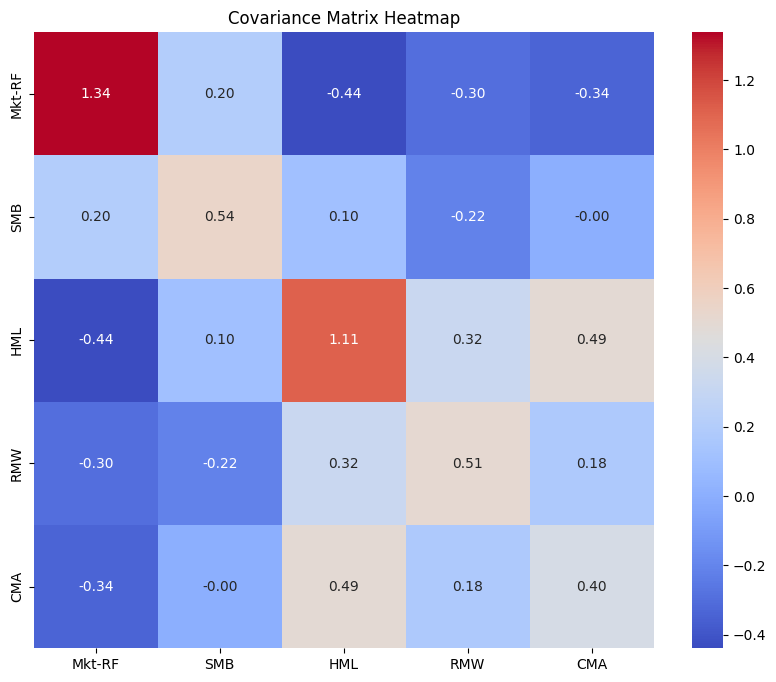

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cov_matrix' is your covariance matrix DataFrame
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(factor_covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [87]:
# run linear regression
import statsmodels.api as sm
factor_levels = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].dropna()

# Dictionary to hold regression results
regressions = {}
for stock in stocks:
    y = returns[stock]
    X = factor_levels
    model = sm.OLS(y, X, missing='drop')
    results = model.fit()
    regressions[stock] = {
        'params': results.params,
        'resid': results.resid,
        'predict': results.predict()
    }
# Example: Output beta coefficients for a specific ETF
# print(regressions['TSLA']['params']) # SPY = 0.009931*(Mkt-Rf) -0.001089*SMB +0.0000197*(HML)+....

In [88]:
import pandas as pd

# Assuming regressions dictionary contains regression results for each ETF
# Extract beta coefficients for each ETF into a DataFrame
betas = pd.DataFrame({stock: values['params'] for stock, values in regressions.items()})

# Optionally, if you're using Jupyter Notebook, simply write 'betas' without print() for a nicer format:
betas


,AAPL,MSFT,NVDA,GOOGL,TSLA,META,PFE,JNJ,MRK,UNH,...,WMT,COST,HD,PG,NKE,CVX,XOM,GE,BA,UBER
Mkt-RF,0.012833,0.011327,0.017532,0.012167,0.013563,0.013987,0.005203,0.004438,0.004099,0.006587,...,0.005163,0.008797,0.009006,0.005716,0.011377,0.008923,0.009388,0.011081,0.012003,0.010937
SMB,-0.001670,-0.004009,-0.003848,-0.003487,0.001198,-0.001212,-0.002831,-0.001865,-0.002464,-0.003830,...,-0.000646,-0.000726,0.004254,-0.002230,0.001161,-0.002859,-0.003648,0.002596,0.003311,0.002134
HML,-0.007300,-0.004719,-0.004185,-0.002360,-0.002640,-0.004562,-0.000383,-0.000801,0.000017,-0.000014,...,-0.001391,-0.004280,-0.001604,-0.002111,-0.000955,0.009809,0.010968,0.004404,0.003441,0.000125
RMW,0.003794,0.003667,-0.001031,0.002240,-0.008833,0.002680,0.001368,0.002699,0.000937,0.001999,...,0.003441,0.005894,0.007679,0.004583,0.003189,-0.006698,-0.008770,-0.000587,-0.004490,-0.011962
CMA,0.008496,-0.000436,-0.009129,-0.003191,-0.008874,-0.005040,0.004614,0.004462,0.005160,0.004238,...,0.003063,0.003025,-0.001154,0.005552,-0.001329,0.003830,0.005590,0.002594,0.002194,-0.008213


In [89]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming 'data' is your DataFrame that includes the factors and 'returns' is the DataFrame with stock returns
factor_levels = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].dropna()

# Dictionary to hold regression results
regressions = {}
for stock in stocks:
    y = returns[stock].dropna()
    X = factor_levels.loc[y.index]  # Align the index of factors with the stock returns
    X = sm.add_constant(X)  # Add constant term to the model
    model = sm.OLS(y, X)
    results = model.fit()
    regressions[stock] = {
        'params': results.params,
        'resid': results.resid,
        'predict': results.predict()
    }

# Extract beta coefficients for each stock into a DataFrame
betas = pd.DataFrame({stock: values['params'] for stock, values in regressions.items()}).T
print("Beta Coefficients:")
print(betas)

# Calculate the covariance matrix of factor levels (excluding the intercept)
factor_cov_matrix = factor_levels.cov()

# Calculate idiosyncratic variance (variance of residuals)
idiosyncratic_var = {stock: regressions[stock]['resid'].var() for stock in stocks}

# Asset covariance matrix calculation using factor model
# Initialize an empty DataFrame
asset_cov_matrix = pd.DataFrame(index=stocks, columns=stocks)

# Populate the asset covariance matrix
for stock_i in stocks:
    for stock_j in stocks:
        beta_i = regressions[stock_i]['params'].drop('const').values  # Exclude intercept
        beta_j = regressions[stock_j]['params'].drop('const').values  # Exclude intercept
        if stock_i == stock_j:
            # Diagonal elements: Variance from factors + idiosyncratic variance
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_i)) + idiosyncratic_var[stock_i]
        else:
            # Off-diagonal elements: Covariance from factors only
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_j))

#print("Asset Covariance Matrix:")
#print(asset_cov_matrix)


Beta Coefficients:
          const    Mkt-RF       SMB       HML       RMW       CMA
AAPL   0.000200  0.012821 -0.001666 -0.007304  0.003778  0.008487
MSFT   0.000646  0.011287 -0.003996 -0.004733  0.003616 -0.000467
NVDA   0.002434  0.017381 -0.003799 -0.004240 -0.001223 -0.009245
GOOGL  0.000507  0.012135 -0.003477 -0.002372  0.002200 -0.003215
TSLA   0.000660  0.013522  0.001212 -0.002655 -0.008886 -0.008906
META   0.000704  0.013943 -0.001198 -0.004578  0.002624 -0.005074
PFE   -0.000446  0.005231 -0.002840 -0.000373  0.001403  0.004635
JNJ   -0.000165  0.004448 -0.001869 -0.000797  0.002712  0.004469
MRK    0.000475  0.004070 -0.002455  0.000007  0.000900  0.005138
UNH    0.000213  0.006573 -0.003826 -0.000019  0.001982  0.004228
AMZN   0.000122  0.012199 -0.004237 -0.000833 -0.000815 -0.009980
NFLX   0.000704  0.011052 -0.004771 -0.002243 -0.004175 -0.009203
DIS   -0.000845  0.009921 -0.000121  0.004588 -0.003337 -0.005715
SBUX  -0.000250  0.009956 -0.000166 -0.001159  0.001800  

In [90]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, float('inf')])
print(c_values)
Realizedreturn_f = []
Sharpe_f =[]
SD_f = []
Max_f = []


for i in c_values:
  expected_returns = returns.mean().values

  # Optimization variables
  num_assets = 30
  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, asset_cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0001  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 2
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]
  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value
  optimized_return = portfolio_return.value
  optimized_variance = portfolio_variance.value

  #print("Optimized Weights:", optimized_weights)
  growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns)
  # Given data
  quarter_return
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd
  weight_diff = (weights_pos - weights_neg).value
  num_positive = np.sum(weight_diff > 0)
  num_negative = np.sum(weight_diff < 0)


  Realizedreturn_f.append(annualized_return*100)
  Sharpe_f.append(sharpe_ratio)
  SD_f.append(daily_sd*100)
  Max_f.append(np.max(weight_diff))
  #print("Annualized Return:", annualized_return)
  #print("Annualized Standard Deviation:", annualized_sd)
  #print("Sharpe Ratio:", sharpe_ratio)


[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10.
  inf]


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
<ipython-input-90-e185ea84d114>:63: RuntimeWarning: divide by zero encountered in scalar divide
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd


In [91]:
print(len(Realizedreturn))
print(c_values.shape)
print(Sharpe_f)
print(Realizedreturn_f)
print(SD_f)
print(Max_f)

15
(15,)
[3.7614975668906974, 2.985563196885241, 2.831818915578304, 2.9635858034421663, 3.1315051086785046, 3.131502158804792, 3.1315872371714635, 3.1315019826677877, 3.1315023148246968, 3.1314941654770885, 3.131520465371643, 3.13150458481634, 3.1314654467026197, 3.131502066008404, -inf]
[46.23446549402506, 45.33169747443959, 47.32290245714139, 53.152632861518036, 57.83422470095876, 57.83420308567906, 57.83498705322727, 57.834158770288056, 57.83414583486728, 57.83413845821006, 57.83452063549894, 57.8342656571577, 57.83421793796659, 57.834157261746185, -100.0]
[0.6905566529959344, 0.8509811927275982, 0.9414769564674897, 1.0235339726158434, 1.0628254467054068, 1.062826013068169, 1.062812908471489, 1.0628251813892309, 1.0628248084437477, 1.06282742593005, 1.0628261877637952, 1.062826448387499, 1.0628387720093213, 1.0628251227573964, 0.0]
[0.2905499857287425, 0.2763905581338586, 0.25541755807389255, 0.24270681075146966, 0.2380269642616951, 0.23802805214554604, 0.23800896372475427, 0.238026

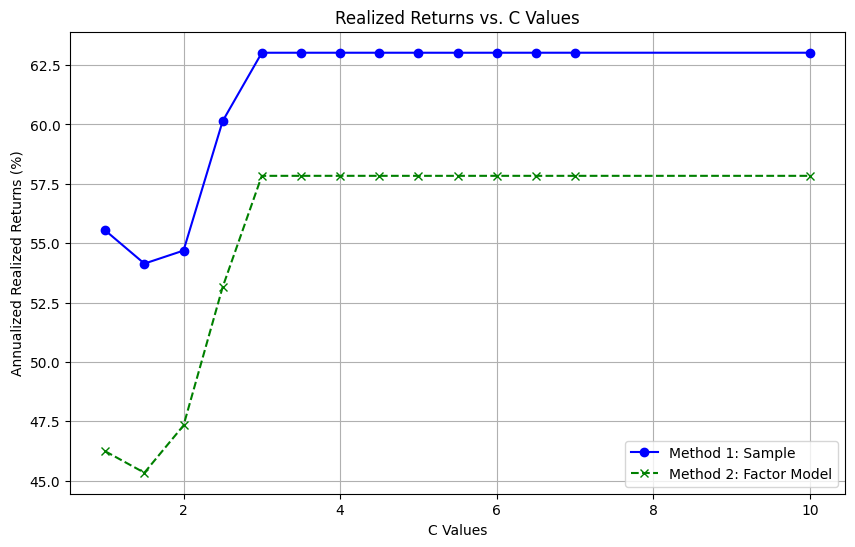

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, float('inf')])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values[:-1], Realizedreturn[:-1], marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Realizedreturn_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('Realized Returns vs. C Values')
plt.xlabel('C Values')
plt.ylabel('Annualized Realized Returns (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


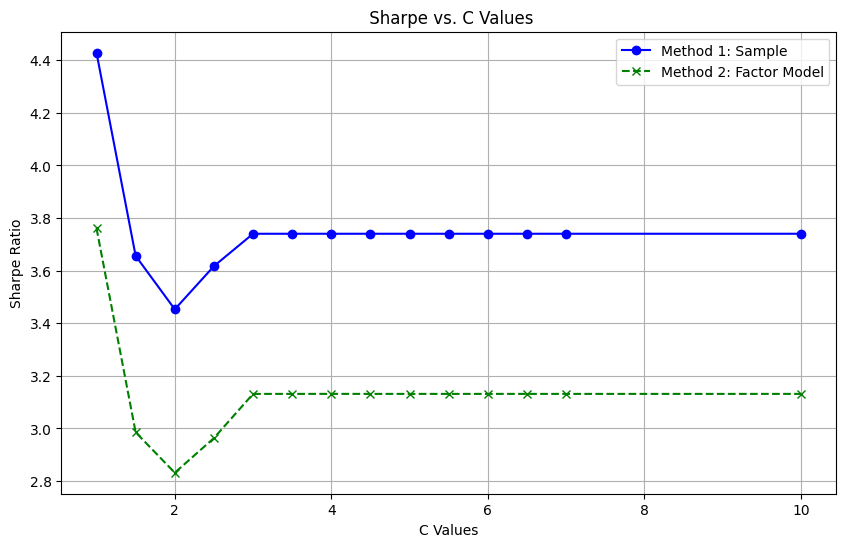

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10,float('inf')])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values[:-1], Sharpe[:-1], marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Sharpe_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title(' Sharpe vs. C Values')
plt.xlabel('C Values')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


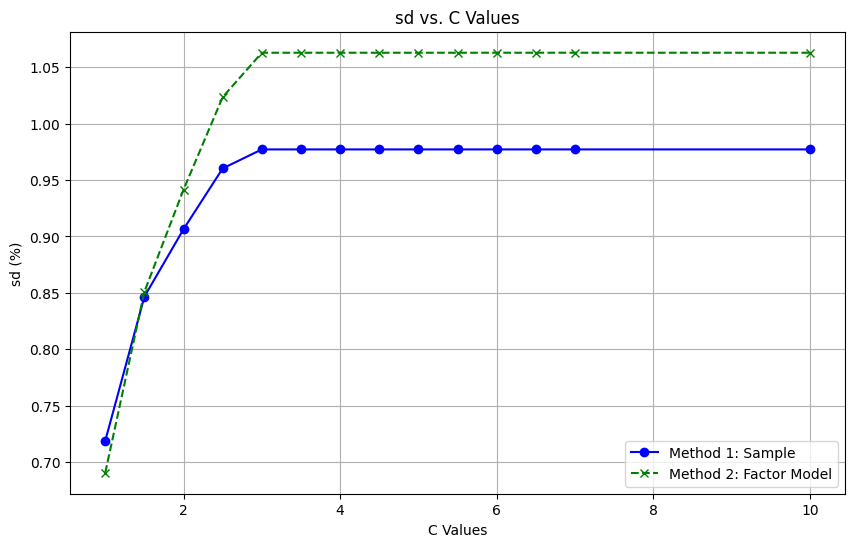

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10,float('inf')])
# Corresponding annualized realized returns (in percentage)
import numpy as np



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values[:-1], SD[:-1], marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, SD_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('sd vs. C Values')
plt.xlabel('C Values')
plt.ylabel('sd (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


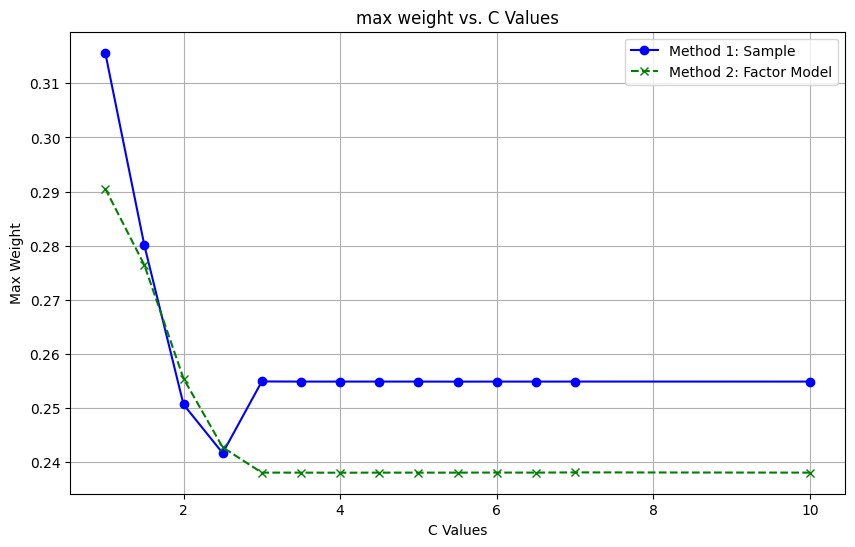

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10,float('inf')])


# Corresponding annualized realized returns (in percentage)
import numpy as np


# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values[:-1], Max[:-1], marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Max_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('max weight vs. C Values')
plt.xlabel('C Values')
plt.ylabel('Max Weight')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()
